In [4]:
%%python
! pip install iplantuml
import iplantuml

    100% |████████████████████████████████| 552kB 3.4MB/s ta 0:00:011
  Stored in directory: /home/jovyan/.cache/pip/wheels/98/e3/22/5474b6852d1717733862688fe1d1470f749f1fe7ae0d508ce7
Successfully built iplantuml


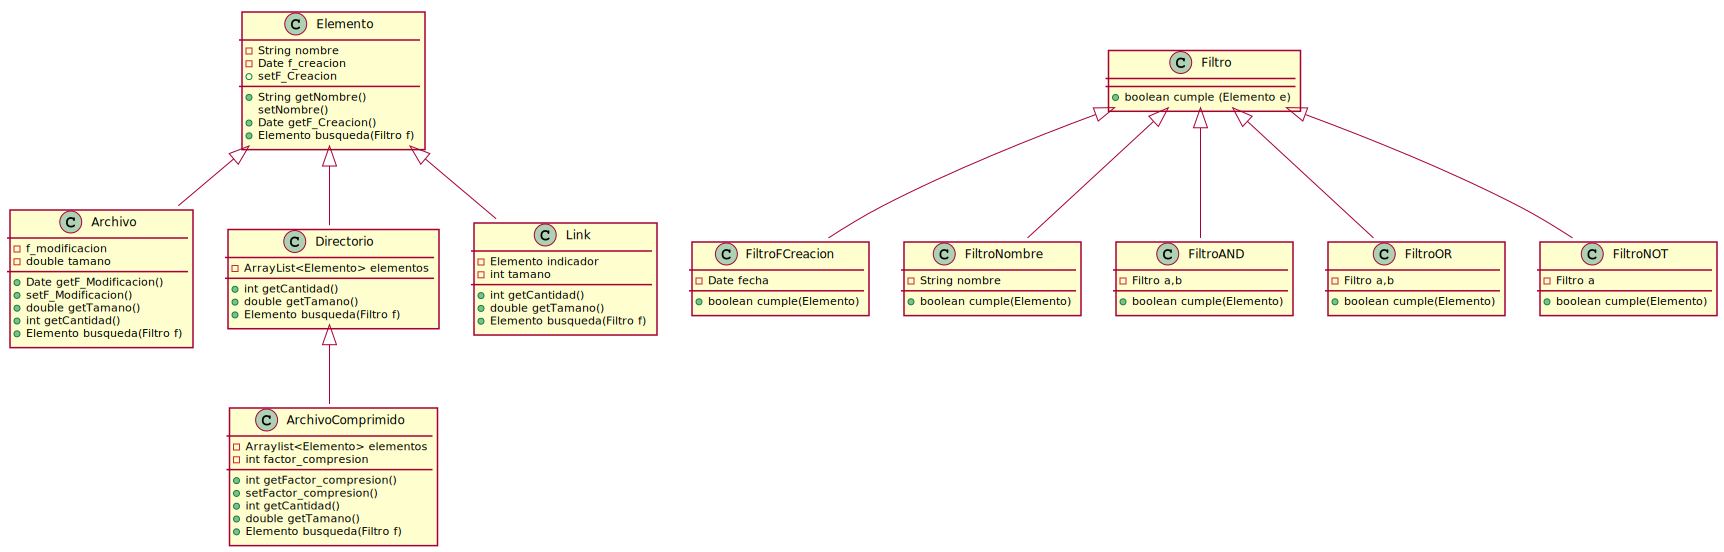

In [5]:
%%python
%%plantuml 

@startuml


 Elemento : -String nombre
    Elemento : -Date f_creacion
    Elemento : +String getNombre()
    Elemento : setNombre()
    Elemento : +Date getF_Creacion()
    Elemento : +setF_Creacion
    Elemento : +Elemento busqueda(Filtro f)
        
    Elemento <|-- Archivo
    Archivo : -f_modificacion
    Archivo : -double tamano
    Archivo : +Date getF_Modificacion()
    Archivo : +setF_Modificacion()
    Archivo : +double getTamano()
    Archivo : +int getCantidad()
    Archivo : +Elemento busqueda(Filtro f)
        
    Directorio <|-- ArchivoComprimido 
    ArchivoComprimido : -Arraylist<Elemento> elementos
    ArchivoComprimido : -int factor_compresion
    ArchivoComprimido : +int getFactor_compresion()
    ArchivoComprimido : +setFactor_compresion()
    ArchivoComprimido : +int getCantidad()
    ArchivoComprimido : +double getTamano()
    ArchivoComprimido : +Elemento busqueda(Filtro f)
        
    Elemento <|-- Directorio    
    Directorio : -ArrayList<Elemento> elementos
    Directorio : +int getCantidad()
    Directorio : +double getTamano()
    Directorio : +Elemento busqueda(Filtro f)
        
    Elemento <|-- Link
    Link : -Elemento indicador
    Link : -int tamano
    Link : +int getCantidad()
    Link : +double getTamano()
    Link : +Elemento busqueda(Filtro f)
        
    Filtro : +boolean cumple (Elemento e)
        
    Filtro <|-- FiltroFCreacion
    FiltroFCreacion : -Date fecha
    FiltroFCreacion : +boolean cumple(Elemento)
        
    Filtro <|-- FiltroNombre
    FiltroNombre : -String nombre
    FiltroNombre : +boolean cumple(Elemento)
        
    Filtro <|-- FiltroAND
    FiltroAND : -Filtro a,b
    FiltroAND : +boolean cumple(Elemento)
        
    Filtro <|-- FiltroOR
    FiltroOR : -Filtro a,b
    FiltroOR : +boolean cumple(Elemento)
        
    Filtro <|-- FiltroNOT
    FiltroNOT : -Filtro a
    FiltroNOT : +boolean cumple(Elemento)

@enduml


In [ ]:
public abstract class Elemento {
	
	private String nombre;
	private Date f_creacion;
	
	public Elemento (String n, Date fecha) {
		setNombre(n);
		setF_creacion(fecha);
	}

	public String getNombre() {
		return nombre;
	}

	public void setNombre(String nombre) {
		this.nombre = nombre;
	}

	public Date getF_creacion() {
		return f_creacion;
	}

	public void setF_creacion(Date f_creacion) {
		this.f_creacion = f_creacion;
	}

	public abstract double getTamano();
	public abstract int getCantidad();
	public abstract Elemento busqueda(Filtro f);
}

In [ ]:
public class Archivo extends Elemento{
	
	private Date f_modificacion;
	private double tamano;

	public Archivo(String n, Date creacion, Date modificacion, double tam) {
		super(n, creacion);
		setF_modificacion(modificacion);
		tamano=tam;
	}
	
	@Override
	public double getTamano() {
		return tamano;
	}

	@Override
	public int getCantidad() {
		return 1;
	}

	public Date getF_modificacion() {
		return f_modificacion;
	}

	public void setF_modificacion(Date f_modificacion) {
		this.f_modificacion = f_modificacion;
	}

	@Override
	public Elemento busqueda(Filtro f) {
		if (f.cumple(this))
			return this;
		else
			return null;
	}
}

In [ ]:
public class Directorio extends Elemento{
	
	private ArrayList<Elemento> elementos;
	
	public Directorio(String n, Date fecha) {
		super(n, fecha);
		elementos=new ArrayList<Elemento>();
	}

	@Override
	public double getTamano() {
		double total=0;
		for (Elemento e : elementos) {
			total+=e.getTamano();
		}
		return total;
	}

	@Override
	public int getCantidad() {
		int total=0;
		for (Elemento e: elementos) {
			total+=e.getCantidad();
		}
		return total;
	}

	@Override
	public Elemento busqueda(Filtro f) {
		for (Elemento e : elementos) {
			if (f.cumple(e))
				return this;
		}
		return null;
	}
}

In [ ]:
public class ArchivoComprimido extends Directorio{
	
	private double tasa_compresion;

	public ArchivoComprimido(String n, Date fecha, double tasa) {
		super(n, fecha);
		this.setTasa_compresion(tasa);
	}

	public double getTasa_compresion() {
		return tasa_compresion;
	}

	public void setTasa_compresion(double tasa_compresion) {
		this.tasa_compresion = tasa_compresion;
	}
 
	public double getTamano() {
		return super.getTamano()*getTasa_compresion();
	}

}

In [ ]:
public class Link extends Elemento{
	
	private int tamano=1;
	private Elemento indicador;
	
	public Link(String n, Date fecha, Elemento e) {
		super(n, fecha);
		indicador=e;
	}

	@Override
	public double getTamano() {
		return tamano;
	}

	@Override
	public int getCantidad() {
		return 1;
	}

	@Override
	public Elemento busqueda(Filtro f) {
		if (f.cumple(indicador)) {
			return indicador;
		}
		return null;
	}
}

In [ ]:
public interface Filtro {
	
	public abstract boolean cumple (Elemento e);
}

In [ ]:
public class FiltroFCreacion implements Filtro{

	private Date fecha;
	
	public FiltroFCreacion(Date f) {
		this.fecha=f;
	}
	
	@Override
	public boolean cumple(Elemento e) {
		return e.getF_creacion().equals(this.fecha);
	}
}

In [ ]:
public class FiltroNombre implements Filtro{
	
	private String nombre;
	
	public FiltroNombre(String n) {
		this.nombre=n;
	}

	@Override
	public boolean cumple(Elemento e) {
		return e.getNombre().equals(this.nombre);
	}
}

In [ ]:

public class FiltroAND implements Filtro{
	
	private Filtro a;
	private Filtro b;
	
	public FiltroAND(Filtro x, Filtro y) {
		a=x;
		b=y;
	}

	@Override
	public boolean cumple(Elemento e) {
		return (a.cumple(e) && b.cumple(e));
	}
}

In [ ]:
public class FiltroNOT implements Filtro {
	
	private Filtro filtro;
	
	public FiltroNOT (Filtro f) {
		this.filtro=f;
	}

	@Override
	public boolean cumple(Elemento e) {
		return !(filtro.cumple(e));
	}
}

In [ ]:
public class FiltroOR implements Filtro{
	
	private Filtro a;
	private Filtro b;
	
	public FiltroOR(Filtro x, Filtro y) {
		a=x;
		b=y;
	}

	@Override
	public boolean cumple(Elemento e) {
		return (a.cumple(e) || b.cumple(e));
	}
}